In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import tqdm
import multiprocessing as mp
from config import *

path = result_parent_directory + os.sep + 'step4_btms_sizing_sensitivity'

result_directory = path + os.sep + 'analysis'
os.makedirs(result_directory, exist_ok=True)
figure_directory = path + os.sep + 'figures'
os.makedirs(figure_directory, exist_ok=True)

sizing_results_path = os.path.join(path, 'sizing_results')

load results 

In [2]:
# load all results from path to list and add taz name as df name
sizing_results = []
sizing_results_params = []
for folder in os.listdir(sizing_results_path):
    sizing_results_one_param_combination = []
    for file in os.listdir(sizing_results_path + os.sep + folder):
        if file.startswith('btms_sizing'):
            if file.endswith(".csv"):
                df0 = pd.read_csv(os.path.join(sizing_results_path, folder, file), index_col=0)
                name = file.split('.')[0]
                #remove btms_sizing from name
                df0.name = name.split('_')[2]
                sizing_results_one_param_combination.append(df0)
    sizing_results.append(sizing_results_one_param_combination)

In [3]:
for combination in sizing_results:
    print(combination[0].columns[-1])
#recognize parameters for each result in sizing_results
sizing_results_params = []
for x in sizing_results:
    df0 = x[0]
    a = df0['param: btms size, a,b_sys,b_cap,b_loan,c'][1]
    b_sys = df0['param: btms size, a,b_sys,b_cap,b_loan,c'][2]
    b_cap = df0['param: btms size, a,b_sys,b_cap,b_loan,c'][3]
    b_loan = df0['param: btms size, a,b_sys,b_cap,b_loan,c'][4]
    c = df0['param: btms size, a,b_sys,b_cap,b_loan,c'][5]
    param_dict= {'a': [a], 'b_sys': [b_sys], 'b_cap': [b_cap], 'b_loan':[b_loan], 'c': [c]}
    sizing_results_params.append(pd.DataFrame(param_dict))

param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c


In [7]:
#
df_params = pd.concat(sizing_results_params, axis=0)
df_params.index = df_params['a'] * 365/12
df_params.sort_index(inplace=True)
df_params.head()

,a,b_sys,b_cap,b_loan,c
a,,,,,
0.0,0.000000,0.04324,0.023148,0.009342,0.12
1.0,0.032877,0.04324,0.023148,0.009342,0.12
2.0,0.065753,0.04324,0.023148,0.009342,0.12
3.0,0.098630,0.04324,0.023148,0.009342,0.12
4.0,0.131507,0.04324,0.023148,0.009342,0.12


In [9]:
# create a list of all a values
a_values = []
for x in sizing_results_params:
    a_values.append(x['a'].values[0])
# create an idx list for sorting
a_values_idx = np.argsort(a_values)
# sort sizing_results and sizing_results_params
sizing_results = [sizing_results[i] for i in a_values_idx]
sizing_results_params = [sizing_results_params[i] for i in a_values_idx]

In [10]:
# show all a values multiplied by 365/12
a_values = [x['a'].values[0] for x in sizing_results_params]
a_values = [x*365/12 for x in a_values]
# round to 2 decimal places
a_values = [round(x, 2) for x in a_values]
print(a_values)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]


In [11]:
from functions.stats_sizing_function import stats_sizing_function
# create df with stats for each parameter combination and each taz
stats_per_param_combination_list = []
for sizing_results_one_param_combination in sizing_results:
    stats = pd.DataFrame()
    for df0 in sizing_results_one_param_combination:
        stats = stats.append(pd.DataFrame(stats_sizing_function(df0, timestep), index=[df0.name]))
    stats_per_param_combination_list.append(stats)

In [13]:
stats_per_param_combination = pd.concat(stats_per_param_combination_list, keys=a_values)

In [14]:
# show stats for a = 1
stats_per_param_combination.loc[10].describe()

,btms_size,cost_a,cost_b_sys,cost_b_cap,cost_b_loan,cost_b,cost_c,cost_total,share_cost_a,share_cost_b_sys,share_cost_b_cap,share_cost_b_loan,share_cost_b,share_cost_c,E_Charge,c_rate,cycles_day,btms_ratio,load_factor,btms_peak_to_grid_ratio
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,269.394443,11.741865,19.831884,15.004520,6.055435,34.836405,11.726512,58.304782,0.181484,0.368996,0.252368,0.101849,0.621364,0.197152,683.684094,1.935286,2.071113,0.865516,0.973692,19.046980
std,112.187124,10.032722,7.660558,6.905498,2.786880,12.514140,5.405072,25.844589,0.060733,0.124354,0.045632,0.018416,0.085065,0.035563,441.610667,0.923095,0.730534,0.097021,0.087180,15.219784
min,43.676603,0.708816,6.189598,1.189450,0.480031,9.844192,0.924916,14.939489,0.045142,0.118886,0.075752,0.030572,0.398001,0.058905,44.000000,0.545681,1.000000,0.408971,0.551907,2.423551
25%,190.673643,6.099095,12.348573,9.569152,3.861862,24.138663,7.482237,40.322789,0.148679,0.283195,0.228961,0.092403,0.571807,0.179067,382.416667,1.289404,1.556678,0.832623,1.000000,10.604280
50%,255.317698,10.354984,20.796655,15.538453,6.270917,34.985195,12.082701,57.576642,0.173343,0.358394,0.257713,0.104006,0.619929,0.200809,651.916667,1.733114,1.934484,0.878005,1.000000,15.799856
75%,338.038063,13.810653,24.575555,19.822437,7.999822,43.670417,15.527285,72.415301,0.202479,0.443602,0.283234,0.114306,0.667742,0.221487,878.083333,2.443922,2.304954,0.929905,1.000000,22.227507
max,564.862521,74.713070,48.547455,32.935608,13.291958,80.812246,25.634597,181.159913,0.427108,0.820201,0.330802,0.133503,0.895953,0.257232,2957.166667,6.819304,5.174006,0.992650,1.000000,138.147725


In [15]:
stats_per_param_combination.loc[1].describe()

,btms_size,cost_a,cost_b_sys,cost_b_cap,cost_b_loan,cost_b,cost_c,cost_total,share_cost_a,share_cost_b_sys,share_cost_b_cap,share_cost_b_loan,share_cost_b,share_cost_c,E_Charge,c_rate,cycles_day,btms_ratio,load_factor,btms_peak_to_grid_ratio
count,1.570000e+02,157.000000,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,157.000000,157.000000,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,157.000000,157.000000,157.000000,1.570000e+02,157.000000,1.570000e+02
mean,3.420093e+01,9.454515,9.024122e+00,1.349979e+00,5.448164e-01,1.037410e+01,1.049743e+00,20.878359,0.554805,3.495702e-01,5.379405e-02,2.170989e-02,4.033643e-01,4.183026e-02,683.684094,8.085842,2.787318,1.257994e-01,0.119170,2.019176e+00
std,3.058992e+01,3.161766,7.306852e+00,1.286121e+00,5.190452e-01,8.339038e+00,1.000088e+00,9.554434,0.310477,2.402155e-01,5.079125e-02,2.049803e-02,2.783236e-01,3.949527e-02,441.610667,11.730631,2.972974,2.214529e-01,0.127393,6.202266e+00
min,8.876032e-09,0.215743,7.360941e-10,2.197036e-09,8.866670e-10,2.933131e-09,1.740282e-09,4.931507,0.011667,7.463176e-11,2.227551e-10,8.989818e-11,2.973868e-10,1.764453e-10,44.000000,0.406679,1.000000,1.168815e-10,0.029293,5.674503e-11
25%,3.647587e-06,9.863014,2.293980e-07,2.295927e-07,9.265766e-08,4.495515e-07,1.786126e-07,9.863014,0.355443,2.325840e-08,2.327815e-08,9.394456e-09,4.557953e-08,1.810933e-08,382.416667,3.088117,1.083879,2.431623e-08,0.064246,1.768414e-08
50%,3.209705e+01,9.863014,1.206039e+01,1.147013e+00,4.629047e-01,1.357655e+01,8.919173e-01,19.993752,0.408746,4.416394e-01,4.999894e-02,2.017828e-02,5.667429e-01,3.887917e-02,651.916667,5.325106,1.594400,5.950058e-02,0.096207,1.000000e+00
75%,5.358828e+01,9.863014,1.297196e+01,2.188862e+00,8.833678e-01,1.525156e+01,1.702059e+00,26.554357,1.000000,5.274472e-01,8.303043e-02,3.350893e-02,5.676796e-01,6.456446e-02,878.083333,7.442649,2.425501,1.162868e-01,0.125359,1.000000e+00
max,1.164167e+02,19.726027,3.242989e+01,5.114152e+00,2.063939e+00,3.754405e+01,3.976765e+00,61.246839,1.000000,8.352683e-01,2.108814e-01,8.510628e-02,9.123479e-01,1.639814e-01,2957.166667,63.735506,13.566338,9.758834e-01,0.963863,4.471641e+01


In [43]:
stats_per_param_combination.loc[0].columns

Index(['btms_size', 'cost_a', 'cost_b_sys', 'cost_b_cap', 'cost_b_loan',
       'cost_b', 'cost_c', 'cost_total', 'share_cost_a', 'share_cost_b_sys',
       'share_cost_b_cap', 'share_cost_b_loan', 'share_cost_b', 'share_cost_c',
       'E_Charge', 'c_rate', 'cycles_day', 'btms_ratio', 'load_factor',
       'btms_peak_to_grid_ratio'],
      dtype='object')

Text(0.5, 1.0, 'btms peak to grid ratio for each a value')

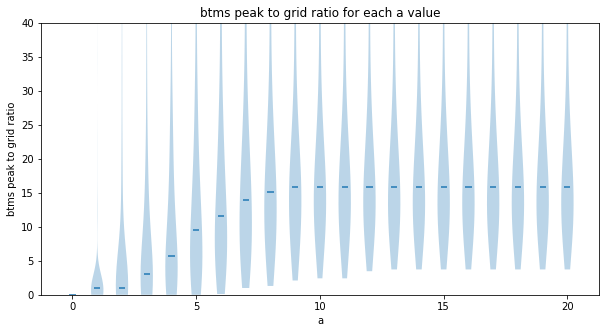

In [16]:
# get btms peak to grid ratio mean and std for each a value
btms_peak_to_grid_ratio_mean = []
btms_peak_to_grid_ratio_std = []
# for a in a_values:
#     btms_peak_to_grid_ratio_mean.append(stats_per_param_combination.loc[a]['btms_peak_to_grid_ratio'].mean())
#     btms_peak_to_grid_ratio_std.append(stats_per_param_combination.loc[a]['btms_peak_to_grid_ratio'].std())

# plot btms peak to grid ratio mean and std for each a value
# fig, ax = plt.subplots(figsize=(10, 5))
# ax.errorbar(a_values, btms_peak_to_grid_ratio_mean, yerr=btms_peak_to_grid_ratio_std, fmt='o')
# ax.set_xlabel('a')
# ax.set_ylabel('btms peak to grid ratio')
# ax.set_title('btms peak to grid ratio mean and std for each a value')

# plot violin plot for btms peak to grid ratio for each a value
plt.rcParams['font.size'] = 10
fig, ax = plt.subplots(figsize=(10, 5))
x = stats_per_param_combination['btms_peak_to_grid_ratio']
dists = [stats_per_param_combination.loc[i]['btms_peak_to_grid_ratio'] for i in a_values]
ax.violinplot(dists, a_values, showmeans=False, showextrema=False, showmedians=True)
ax.set_xlabel('a')
ax.set_ylim(0, 40)
ax.set_ylabel('btms peak to grid ratio')
ax.set_title('btms peak to grid ratio for each a value')


PermissionError: [Errno 13] Permission denied: 'results\\advancedScenario7\\step4_btms_sizing_sensitivity\\figures\\stats_per_a_value.pdf'

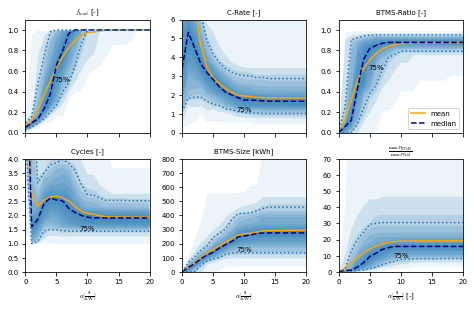

In [84]:
# make a plot of the stats over the a values for mu and sigma of the btms ratio
zoom =1
pltSettings()
fig, ax_arr = plt.subplots(2, 3, figsize=(zoom*plotSizeX2col, zoom*1.6*plotSizeY2col), sharex=True, sharey=False)
ax = ax_arr.flatten()

def plot_mean_median_color_area(ax, column, alpha):
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).mean(), label='mean', color='orange')
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).median(), label='median', color='darkblue', linestyle='--')
    for i in np.arange(0, 1, 0.05):
        ax.fill_between(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).quantile(i), stats_per_param_combination.loc[:, column].groupby(level=0).quantile(1-i), alpha=alpha,  color='C0', linewidth=0, rasterized=True)
    # add lines for 12.5% and 87.5% quantile
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).quantile(0.125), color='C0', linestyle=':')
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).quantile(0.875), color='C0', linestyle=':')
    # add text for 12.5% and 87.5% quantile
    # mark area with 75%
    if column == 'load_factor':
        x = 6
    elif column == 'btms_ratio':
        x = 6
    elif column == 'cost_a':
        x = 15
    else:
        x = 10
    y = stats_per_param_combination.loc[:, column].groupby(level=0).quantile(0.125).values[x+1]
    ax.text(x,y, '75%', horizontalalignment='center', verticalalignment='bottom') #, transform=ax.transAxes)
    # add x and y label
    #ax.set_ylabel(column)
    # add legend
    #ax.legend()
    ax.set_xlim(0, 20)

alpha = 0.08
plot_mean_median_color_area(ax[2], 'btms_ratio', alpha)
plot_mean_median_color_area(ax[1], 'c_rate', alpha)
plot_mean_median_color_area(ax[0], 'load_factor', alpha)
plot_mean_median_color_area(ax[3], 'cycles_day', alpha)
plot_mean_median_color_area(ax[4], 'btms_size', alpha)
plot_mean_median_color_area(ax[5], 'btms_peak_to_grid_ratio', alpha)
           
# ax0
ax[2].set_ylim(0, 1.1)
ax[2].set_title('BTMS-Ratio [-]', fontsize = 7)
# ax1
ax[1].set_ylim(0, 6)
ax[1].set_title('C-Rate [-]', fontsize = 7)
# plot legend with rectangular shape
#ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=7)

# ax2
ax[0].set_ylim(0, 1.1)
ax[0].set_title(r'$f_\mathrm{load}$ [-]', fontsize = 7)
ax[2].legend(loc = 'lower right', fontsize = 7)
# ax3
ax[3].set_ylim(0, 4)
ax[3].set_title('Cycles [-]', fontsize = 7)
ax[3].set_xlabel(r'$a [\frac{\$}{\mathrm{kW}}]$')
# ax4
ax[4].set_ylim(0, 800)
ax[4].set_title('BTMS-Size [kWh]', fontsize = 7)
ax[4].set_xlabel(r'$a [\frac{\$}{\mathrm{kW}}]$')
# ax5
ax[5].set_ylim(0, 70)
ax[5].set_title(r'$\frac{\max{P_\mathrm{BTMS}}}{\max{P_\mathrm{Grid}}}$', fontsize = 7)
ax[5].set_xlabel(r'$a [\frac{\$}{\mathrm{kW}}]$ [-]')

fig.tight_layout()

# save plot
fig.savefig(os.path.join(figure_directory, 'stats_per_a_value.pdf'), dpi=300, bbox_inches='tight')

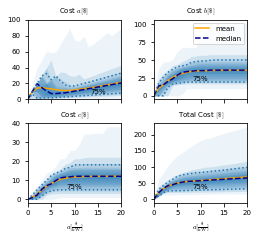

In [80]:
%matplotlib inline
plot_cols = ['cost_a','cost_b', 'cost_c', 'cost_total']
col_titles = [r'Cost $a [\$]$', r'Cost $b [\$]$', r'Cost $c [\$]$', r'Total Cost $[\$]$']
# make a plot of the stats over the a values for mu and sigma of the btms ratio
zoom =1
pltSettings()
fig, ax_arr = plt.subplots(2,2, figsize=(zoom*plotSizeX, zoom*2*1.4*plotSizeY), sharex=True, sharey=False)
ax = ax_arr.flatten()

for i, col in enumerate(plot_cols):
    plot_mean_median_color_area(ax[i], col, alpha)
    ax[i].set_title(col_titles[i], fontsize = 7)

ax[0].set_ylim(0,100)
ax[1].legend(loc = 'upper right', fontsize = 7)
ax[2].set_xlabel(r'$a [\frac{\$}{\mathrm{kW}}]$')
ax[3].set_xlabel(r'$a [\frac{\$}{\mathrm{kW}}]$')

fig.tight_layout()
plt.show()

# export to pdf
fig.savefig(os.path.join(figure_directory, 'costs_per_a.pdf'), dpi=300, bbox_inches='tight')

In [71]:
a_values

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0]

In [87]:
# print trajectories for a = 3
a = 3
sizing_results_a_choosen = sizing_results[a+1]

# plot results
from tqdm import tqdm
for df in tqdm(sizing_results_a_choosen):
    pltSettings()
    # use seaborn style
    plt.style.use('seaborn')
    # box around legend
    plt.rcParams['legend.frameon'] = True
    fig, ax = plt.subplots(2,1, figsize=(10,10), sharex=True, gridspec_kw={'height_ratios': [2, 1]} )
    time_in_h = df['time']/3600
    stats_i = stats_sizing_function(df, timestep)

    btms_size = df['param: btms size, a,b_sys,b_cap,b_loan,c'].iloc[0]

    ax[0].step(time_in_h, df['P_BTMS'], label=r'$P_\Theta$')
    ax[0].step(time_in_h, df['P_Charge'], label=r'$P_{Charge}$')
    ax[0].step(time_in_h, df['P_Grid'], label=r'$P_{Grid}$')
    ax[0].set_title('Power usage at ' + df.name)
    ax[0].set_ylabel('Power [kW]')
    # legend outside of plot
    ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax[1].plot(time_in_h, df['E_BTMS'] - df['E_BTMS'].min(), label=r'$E_\Theta$')
    ax[1].hlines(btms_size, 0, max(time_in_h), label='BTMS-Size', linestyles='dashed')
    ax[1].set_ylabel('Energy [kWh]')
    ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax[1].set_xlabel('Time [h]')
    ax[1].set_xlim(0, max(time_in_h))

    # add text box with informations, costs and sizing results
    textstr1 = '\n'.join([
        r'$cost_{a}= \$ %.2f$' % stats_i['cost_a'],
        r'$cost_{b}= \$ %.2f$' % stats_i['cost_b'],
        r'$cost_{c}= \$ %.2f$' % stats_i['cost_c'],
        r'$cost_{total}= \$ %.2f$' % stats_i['cost_total'],])
    textstr2 = '\n'.join([
        r'$BTMS-Size =%.2f$ kWh' % stats_i['btms_size'],
        r'$\max{P_{\Theta}}=%.2f$ kW' % df['P_BTMS'].abs().max(),
        r'$\max{P_{Grid}}=%.2f$ kW' % df['P_Grid'].max(),
        r'C-Rate: %.2f' % stats_i['c_rate'],
        r'Cycles: %.2f' % stats_i['cycles_day'],
        r'BTMS-Ratio: %.2f' % stats_i['btms_ratio'],
        r'Load-Factor(Grid): %.2f' % stats_i['load_factor'],
        ])
    textstr = '\n'.join([
        textstr1, 
        textstr2])
    
    # add text under legend of first plot
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax[0].text(1.05, 0.10, textstr, transform = ax[0].transAxes, fontsize = 10, bbox=props, va='bottom', ha='left')
    os.makedirs(os.path.join(figure_directory, 'a ' + str(a)), exist_ok=True)
    plt.savefig(os.path.join(figure_directory, 'a ' + str(a), df.name + '_btms_sizing.png'), dpi=300, bbox_inches='tight')
    plt.close()

100%|██████████| 157/157 [04:15<00:00,  1.63s/it]
